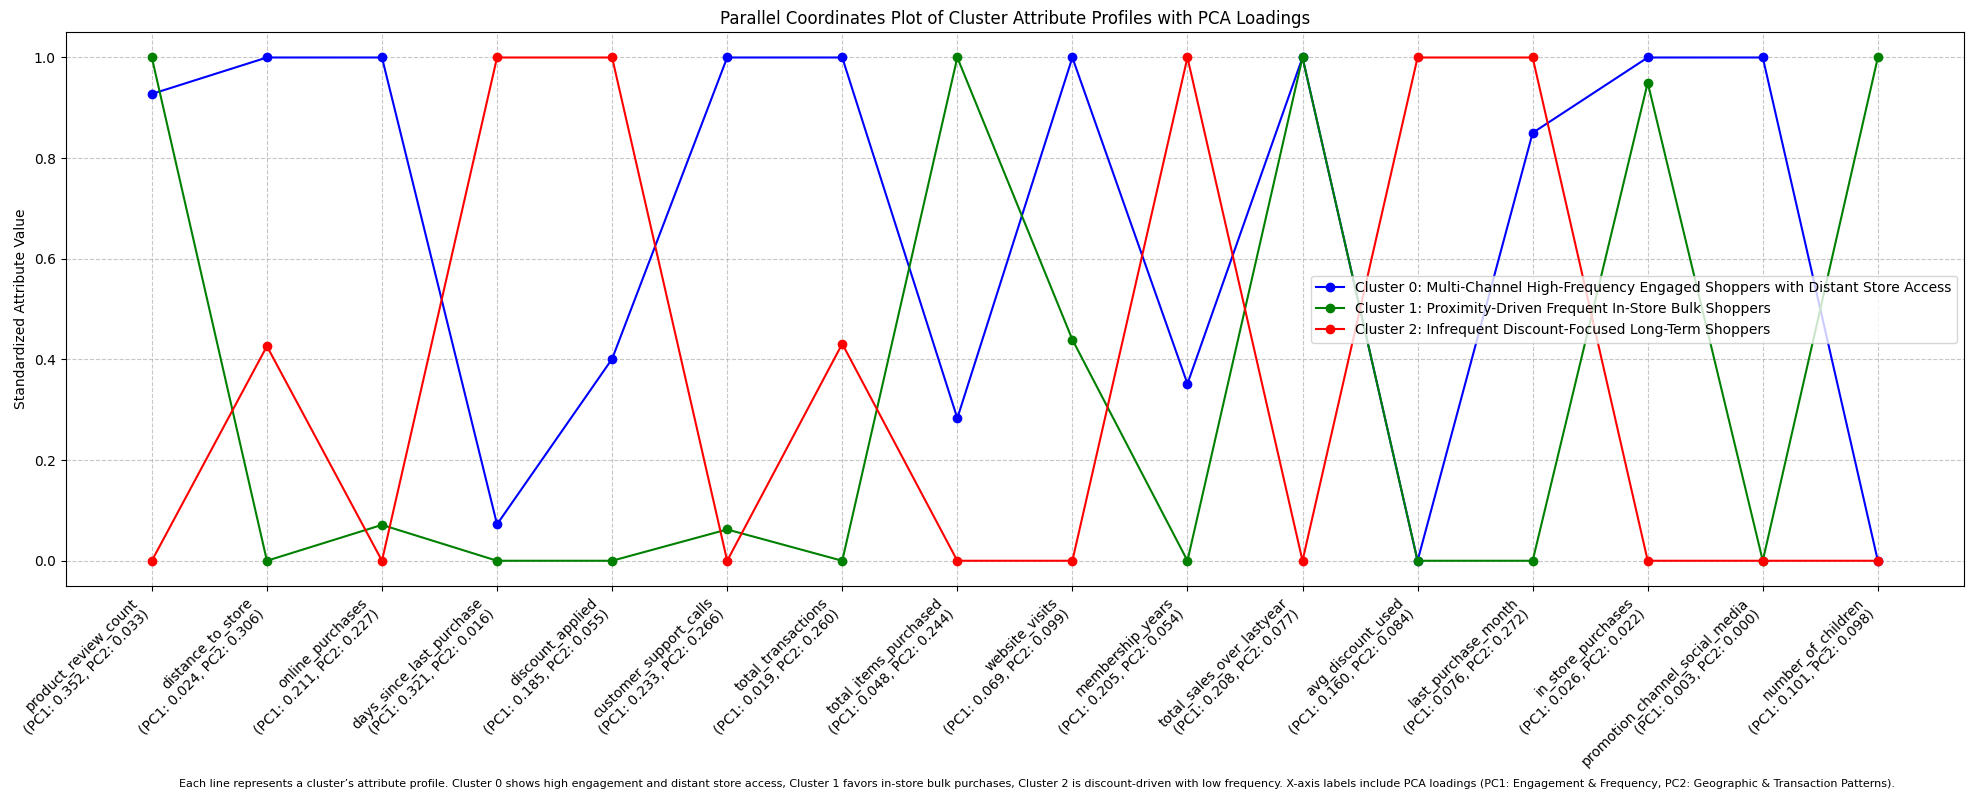

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Data with all significant attributes
data = {
    "Cluster": [
        "Cluster 0: Multi-Channel High-Frequency Engaged Shoppers with Distant Store Access",
        "Cluster 1: Proximity-Driven Frequent In-Store Bulk Shoppers",
        "Cluster 2: Infrequent Discount-Focused Long-Term Shoppers"
    ],
    "product_review_count": [0.167017, 0.210333, -0.387713],
    "distance_to_store": [0.300149, -0.269636, -0.026718],
    "online_purchases": [0.223115, -0.200433, -0.232943],
    "days_since_last_purchase": [-0.152263, -0.191753, 0.353464],
    "discount_applied": [0.081811, 0.0, 0.203976],
    "customer_support_calls": [0.110766, -0.234252, -0.257132],
    "total_transactions": [0.255302, -0.229348, -0.020394],
    "total_items_purchased": [0.022853, 0.214929, -0.053052],
    "website_visits": [0.097240, 0.0, -0.076206],
    "membership_years": [0.0, -0.122293, 0.225427],
    "total_sales_over_lastyear": [0.0, 0.0, -0.229454],
    "avg_discount_used": [0.0, 0.0, 0.176617],
    "last_purchase_month": [-0.035912, -0.239812, 0.0],
    "in_store_purchases": [0.021864, 0.015762, -0.1],
    "promotion_channel_social_media": [0.003437, 0.0, 0.0],
    "number_of_children": [0.0, 0.060365, 0.0]
}
df = pd.DataFrame(data)

# Standardize values for plotting
df_scaled = df.iloc[:, 1:].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

# PCA loadings for x-axis labels
pca_loadings = {
    "product_review_count": (0.351882, 0.032676),
    "distance_to_store": (0.024249, 0.305939),
    "online_purchases": (0.211415, 0.227419),
    "days_since_last_purchase": (0.320798, 0.016215),
    "discount_applied": (0.185125, 0.054905),
    "customer_support_calls": (0.233369, 0.265792),
    "total_transactions": (0.018509, 0.260227),
    "total_items_purchased": (0.048149, 0.243867),
    "website_visits": (0.069163, 0.099116),
    "membership_years": (0.204593, 0.054198),
    "total_sales_over_lastyear": (0.208249, 0.077199),
    "avg_discount_used": (0.160294, 0.083804),
    "last_purchase_month": (0.075662, 0.272100),
    "in_store_purchases": (0.026369, 0.022286),
    "promotion_channel_social_media": (0.003437, 0.0),
    "number_of_children": (0.100988, 0.098089)
}

# Create x-axis labels with PCA loadings
xticklabels = [f"{col}\n(PC1: {pca_loadings[col][0]:.3f}, PC2: {pca_loadings[col][1]:.3f})"
               for col in df_scaled.columns]

# Plot parallel coordinates
fig, ax = plt.subplots(figsize=(20, 8))  # Increased size for readability
for i, cluster in enumerate(df["Cluster"]):
    color = {
        "Cluster 0: Multi-Channel High-Frequency Engaged Shoppers with Distant Store Access": "blue",
        "Cluster 1: Proximity-Driven Frequent In-Store Bulk Shoppers": "green",
        "Cluster 2: Infrequent Discount-Focused Long-Term Shoppers": "red"
    }[cluster]
    ax.plot(range(len(df_scaled.columns)), df_scaled.iloc[i], marker="o", color=color, label=cluster)

# Customize axes
ax.set_xticks(range(len(df_scaled.columns)))
ax.set_xticklabels(xticklabels, rotation=45, ha="right", fontsize=10)
ax.set_ylabel("Standardized Attribute Value")
ax.set_title("Parallel Coordinates Plot of Cluster Attribute Profiles with PCA Loadings")
ax.legend()
ax.grid(True, linestyle="--", alpha=0.7)

# Add caption
plt.figtext(0.1, 0.01,
            "Each line represents a cluster’s attribute profile. Cluster 0 shows high engagement and distant store access, "
            "Cluster 1 favors in-store bulk purchases, Cluster 2 is discount-driven with low frequency. "
            "X-axis labels include PCA loadings (PC1: Engagement & Frequency, PC2: Geographic & Transaction Patterns).",
            wrap=True, fontsize=8)

plt.tight_layout()
plt.show()